#üìå Extracci√≥n

In [2]:
import pandas as pd
import json
import urllib.request
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
with urllib.request.urlopen(url) as response:
    data = json.loads(response.read().decode())
df = pd.DataFrame(data)
print("Filas:", df.shape[0], " Columnas:", df.shape[1])
print(df.head())

Filas: 7267  Columnas: 6
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic',

#üîß Transformaci√≥n

In [3]:
df.info()
print(df.describe())
print("\nColumnas del dataset:")
for col in df.columns:
    print(f"- {col} ({df[col].dtype})")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique              

#Comprobaci√≥n de incoherencias en los datos

In [4]:
missing = df.isnull().mean().sort_values(ascending=False) * 100
print("Porcentaje de valores ausentes:")
print(missing[missing > 0])

Porcentaje de valores ausentes:
Series([], dtype: float64)


#Manejo de inconsistencias

In [ ]:
df_clean = df.copy()


df_clean = df_clean.drop_duplicates()


cat_cols = df_clean.select_dtypes(include="object").columns
num_cols = df_clean.select_dtypes(exclude="object").columns


for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

if "TotalCharges" in df_clean.columns:
    df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")


for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


print("Columnas despu√©s de limpieza:", df_clean.columns.tolist())
print("Duplicados:", df_clean.duplicated().sum())
print("Valores nulos:", df_clean.isnull().sum().sum())
print("Dimensiones finales:", df_clean.shape)

df_clean.head()

#Columna de cuentas diarias

In [50]:

if "MonthlyCharges" in df_clean.columns:

    df_clean["Cuentas_Diarias"] = df_clean["MonthlyCharges"] / 30

    print("Columna 'Cuentas_Diarias' creada correctamente ")
    print(df_clean[["MonthlyCharges", "Cuentas_Diarias"]].head())
else:
    print(" La columna 'MonthlyCharges' no existe en el dataset. Revisa el nombre real de la columna de facturaci√≥n.")

 La columna 'MonthlyCharges' no existe en el dataset. Revisa el nombre real de la columna de facturaci√≥n.


#üìä Carga y an√°lisis

#An√°lisis Descriptivo

In [51]:
import pandas as pd


print(" Estad√≠sticas descriptivas (num√©ricas):")
display(df_clean.describe().T)


print("\n Medianas:")
print(df_clean.median(numeric_only=True))


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f"\n Distribuci√≥n de la variable objetivo ({target_col}):")
    print(df_clean[target_col].value_counts(normalize=True) * 100)
else:
    print("\n No se encontr√≥ autom√°ticamente la variable objetivo (churn/evasi√≥n).")


print("\n Variables categ√≥ricas:")
cat_cols = df_clean.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_clean[col].value_counts(normalize=True).head())
    print("Moda:", df_clean[col].mode()[0])

 Estad√≠sticas descriptivas (num√©ricas):


count unique                                                top  \
customerID  7267   7267                                         9995-HOTOH   
Churn       7267      3                                                 No   
customer    7267    891  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
phone       7267      3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
internet    7267    129  {'InternetService': 'No', 'OnlineSecurity': 'N...   
account     7267   6931  {'Contract': 'Month-to-month', 'PaperlessBilli...   

            freq  
customerID     1  
Churn       5174  
customer     223  
phone       3495  
internet    1581  
account        6


 Medianas:
Series([], dtype: float64)

 Distribuci√≥n de la variable objetivo (Churn):
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

 Variables categ√≥ricas:

Columna: customerID
customerID
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
9970-QBCDA    0.000138
9968-FFVVH    0.000138
Name: proportion, dtype: float64
Moda: 0002-ORFBO

Columna: Churn
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64
Moda: No

Columna: customer
customer
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}         0.030687
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}       0.026421
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}      0.010596
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}    0.010458
{'gender': 'Female', 'SeniorCitizen

/tmp/ipython-input-3717714459.py:26: UserWarning: Unable to sort modes: '<' not supported between instances of 'dict' and 'dict'
  print("Moda:", df_clean[col].mode()[0])


#Distribuci√≥n de evasi√≥n

 Usando la columna objetivo: Churn

Distribuci√≥n de churn (%):
Churn
No     71.20
Yes    25.72
        3.08
Name: count, dtype: float64


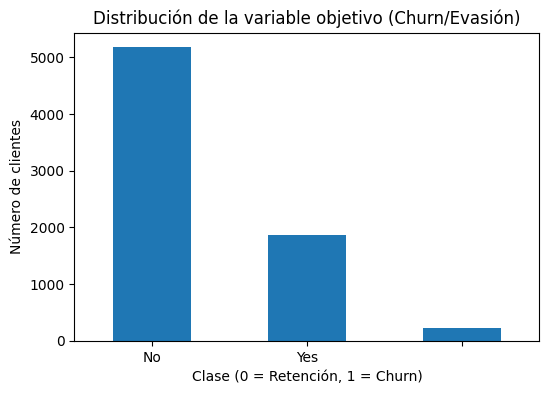

In [53]:
import matplotlib.pyplot as plt


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f" Usando la columna objetivo: {target_col}")


    churn_counts = df_clean[target_col].value_counts()
    churn_rate = churn_counts / churn_counts.sum() * 100
    print("\nDistribuci√≥n de churn (%):")
    print(churn_rate.round(2))


    plt.figure(figsize=(6,4))
    churn_counts.plot(kind="bar", rot=0)
    plt.title("Distribuci√≥n de la variable objetivo (Churn/Evasi√≥n)")
    plt.xlabel("Clase (0 = Retenci√≥n, 1 = Churn)")
    plt.ylabel("N√∫mero de clientes")
    plt.show()


else:
    print(" No se encontr√≥ autom√°ticamente la columna 'churn' o 'evasi√≥n'. Revisa los nombres de columnas.")

#Recuento de evasi√≥n por variables categ√≥ricas

In [ ]:
import matplotlib.pyplot as plt


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f" Analizando churn por variables categ√≥ricas usando: {target_col}")


    cat_cols = df_clean.select_dtypes(include="object").columns

    cat_cols = [c for c in cat_cols if c != target_col]


    for col in cat_cols:
        churn_rate = df_clean.groupby(col)[target_col].mean().sort_values(ascending=False)

        plt.figure(figsize=(7,4))
        churn_rate.plot(kind="bar")
        plt.title(f"Tasa de churn por {col}")
        plt.xlabel(col)
        plt.ylabel("Proporci√≥n de churn")
        plt.xticks(rotation=45, ha="right")
        plt.show()
else:
    print(" No se encontr√≥ autom√°ticamente la columna 'churn' o 'evasi√≥n'. Revisa los nombres de columnas.")

#Conteo de evasi√≥n por variables num√©ricas

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f" Analizando variables num√©ricas seg√∫n: {target_col}")


    num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
    num_cols = [c for c in num_cols if c != target_col]  # excluir target si es num√©rico


    for col in num_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(x=target_col, y=col, data=df_clean, palette="Set2")
        plt.title(f"Distribuci√≥n de {col} por churn")
        plt.xlabel("Churn (0 = Retenci√≥n, 1 = Evasi√≥n)")
        plt.ylabel(col)
        plt.show()


    for col in num_cols:
        plt.figure(figsize=(7,4))
        sns.histplot(data=df_clean, x=col, hue=target_col, kde=True, element="step", stat="density")
        plt.title(f"Histograma de {col} por churn")
        plt.xlabel(col)
        plt.ylabel("Densidad")
        plt.show()

else:
    print(" No se encontr√≥ autom√°ticamente la columna 'churn' o 'evasi√≥n'. Revisa los nombres de columnas.")

 Analizando variables num√©ricas seg√∫n: Churn


#üìÑInforme final

In [57]:
from pathlib import Path
import nbformat as nbf

nb = nbf.v4.new_notebook()
cells = []

cells.append(nbf.v4.new_markdown_cell("""
# Informe Final ‚Äî Churn de Clientes en **Telecom X**

Este informe resume el trabajo de importaci√≥n, limpieza, exploraci√≥n y hallazgos iniciales
para comprender los factores asociados a la **evasi√≥n (churn)** de clientes.
Ejecute las celdas en orden para reproducir los resultados.
"""))

cells.append(nbf.v4.new_markdown_cell("""


**Objetivo:** Analizar el comportamiento de los clientes para identificar patrones que expliquen la **evasi√≥n (churn)** y sentar las bases para modelos predictivos y estrategias de retenci√≥n.

**Contexto del problema:** La empresa presenta una tasa elevada de cancelaciones. Entender qu√© variables (p. ej., **tenure**, **tipo de contrato**, **m√©todo de pago**, **cargos mensuales**) se asocian con la evasi√≥n ayudar√° a priorizar acciones comerciales y operativas.
"""))

cells.append(nbf.v4.new_markdown_cell("""

Se cargan los datos en formato **JSON** desde el repositorio del reto (o desde una ruta local). Luego se convierten a un **DataFrame de Pandas**.
"""))

cells.append(nbf.v4.new_code_cell("""
# === Configuraci√≥n de la fuente de datos ===
RAW_GITHUB_URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
LOCAL_PATH = ""  # Si tienes el archivo local, coloca aqu√≠ la ruta; si se llena, tiene prioridad.
"""))

cells.append(nbf.v4.new_code_cell("""
import json
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

def load_json_to_df(local_path: str = "", url: str = "") -> pd.DataFrame:
    if local_path:
        with open(local_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    else:
        if not url:
            raise ValueError("Proporciona LOCAL_PATH o URL.")
        with urllib.request.urlopen(url) as resp:
            raw = resp.read().decode("utf-8")
        data = json.loads(raw)
    if isinstance(data, dict) and "data" in data:
        data = data["data"]
    if not isinstance(data, list):
        raise TypeError("Se esperaba una lista de registros (list[dict]).")
    return pd.DataFrame(data)

df = load_json_to_df(LOCAL_PATH, RAW_GITHUB_URL)
print("Dimensiones:", df.shape)
display(df.head(5))
"""))

cells.append(nbf.v4.new_markdown_cell("""


- Eliminaci√≥n de duplicados.
- Normalizaci√≥n b√°sica de **categ√≥ricas** (trim y min√∫sculas).
- Conversi√≥n de num√©ricos mal tipados (si aplica).
- Imputaci√≥n simple: mediana (num√©ricas) y moda (categ√≥ricas).
- Creaci√≥n de **Cuentas_Diarias = MonthlyCharges / 30** (si existe `MonthlyCharges`).
"""))

cells.append(nbf.v4.new_code_cell("""
# Copia de trabajo
df_clean = df.copy()

# 3.1 Duplicados
df_clean = df_clean.drop_duplicates()

# 3.2 Separaci√≥n por tipo
cat_cols = df_clean.select_dtypes(include="object").columns.tolist()
num_cols = df_clean.select_dtypes(exclude="object").columns.tolist()

# 3.3 Normalizaci√≥n de categ√≥ricas (trim + lower)
for c in cat_cols:
    df_clean[c] = df_clean[c].astype(str).str.strip().str.lower()

# 3.4 Conversi√≥n num√©rica de columnas mal tipadas comunes
for cand in ["totalcharges", "TotalCharges", "Totalcharges"]:
    if cand in df_clean.columns:
        df_clean[cand] = pd.to_numeric(df_clean[cand], errors="coerce")

# 3.5 Imputaci√≥n simple
for c in num_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())
for c in cat_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].mode()[0])

# 3.6 Creaci√≥n de Cuentas_Diarias (si hay MonthlyCharges)
mc_candidates = [c for c in df_clean.columns if c.lower() == "monthlycharges"]
if mc_candidates:
    mc = mc_candidates[0]
    df_clean["Cuentas_Diarias"] = df_clean[mc] / 30.0

print("Dimensiones tras limpieza:", df_clean.shape)
display(df_clean.head(3))
"""))

cells.append(nbf.v4.new_markdown_cell("""


A continuaci√≥n se presentan estad√≠sticas descriptivas y visualizaciones para comprender la distribuci√≥n del objetivo y su relaci√≥n con variables clave.
"""))

cells.append(nbf.v4.new_code_cell("""
print("=== Estad√≠sticas num√©ricas ===")
display(df_clean.describe().T)

print("\\n=== Medianas num√©ricas ===")
print(df_clean.median(numeric_only=True))
"""))

cells.append(nbf.v4.new_markdown_cell("### 4.1 Distribuci√≥n de la Evasi√≥n (Target)"))

cells.append(nbf.v4.new_code_cell("""
# Detecci√≥n autom√°tica de la columna objetivo (churn/evasi√≥n)
target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if not target_candidates:
    raise ValueError("No se encontr√≥ autom√°ticamente la columna objetivo (churn/evasi√≥n).")
target_col = target_candidates[0]
print("Usando columna objetivo:", target_col)

# Si es texto, normalizamos a binario 0/1
y_raw = df_clean[target_col]
if y_raw.dtype == object:
    y = y_raw.astype(str).str.strip().str.lower().map({
        "yes": 1, "si": 1, "s√≠": 1, "true": 1, "1": 1, "churn": 1, "evade": 1, "evadido": 1, "y": 1
    }).fillna(y_raw.astype(str).str.contains("y|s|1|true|churn|evas", case=False).astype(int))
else:
    y = (y_raw > 0).astype(int)

df_clean[target_col + "_bin"] = y
churn_counts = y.value_counts().sort_index()
churn_rate = y.mean() * 100
print(f"Tasa de churn (%%): {churn_rate:.2f}")

# Barras
plt.figure()
churn_counts.plot(kind="bar", rot=0)
plt.title("Distribuci√≥n de la variable objetivo (0=retenci√≥n, 1=churn)")
plt.xlabel("Clase")
plt.ylabel("N√∫mero de clientes")
plt.show()

# Pastel
plt.figure()
churn_counts.plot(kind="pie", autopct="%.1f%%", startangle=90)
plt.title("Proporci√≥n de clientes retenidos vs churn")
plt.ylabel("")
plt.show()
"""))



cells.append(nbf.v4.new_code_cell("""
cat_cols = df_clean.select_dtypes(include="object").columns.tolist()
cat_cols = [c for c in cat_cols if c != target_col]

 (<= 20)
cards = {c: df_clean[c].nunique() for c in cat_cols}
chosen_cats = [c for c, k in sorted(cards.items(), key=lambda x: x[1]) if k <= 20][:6]

for c in chosen_cats:
    grp = df_clean.groupby(c)[target_col + "_bin"].mean().sort_values(ascending=False)
    plt.figure()
    grp.plot(kind="bar")
    plt.title(f"Tasa de churn por {c}")
    plt.xlabel(c)
    plt.ylabel("Proporci√≥n de churn")
    plt.xticks(rotation=45, ha="right")
    plt.show()
"""))


cells.append(nbf.v4.new_code_cell("""
num_cols = df_clean.select_dtypes(include=[float, int]).columns.tolist()
num_cols = [c for c in num_cols if c not in {target_col, target_col + "_bin"}]


nonnull_ratio = df_clean[num_cols].notna().mean().sort_values(ascending=False)
top_nums = nonnull_ratio.head(6).index.tolist()

for c in top_nums:
    plt.figure()
    df_clean.boxplot(column=c, by=target_col + "_bin")
    plt.suptitle("")
    plt.title(f"Distribuci√≥n de {c} por churn (0/1)")
    plt.xlabel("Churn (0=retenci√≥n, 1=churn)")
    plt.ylabel(c)
    plt.show()
"""))

cells.append(nbf.v4.new_markdown_cell("## 5) Conclusiones e Insights"))

cells.append(nbf.v4.new_code_cell("""
insights = {}

insights["tasa_churn_%"] = float(round(churn_rate, 2))

# Contrato con mayor y menor churn
if "contract" in df_clean.columns:
    by_contract = df_clean.groupby("contract")[target_col + "_bin"].mean().sort_values(ascending=False)
    insights["contrato_alto_churn"] = by_contract.index[0], float(round(by_contract.iloc[0]*100, 2))
    insights["contrato_bajo_churn"] = by_contract.index[-1], float(round(by_contract.iloc[-1]*100, 2))

# M√©todo de pago (si existe)
if "paymentmethod" in df_clean.columns:
    by_pay = df_clean.groupby("paymentmethod")[target_col + "_bin"].mean().sort_values(ascending=False)
    insights["pago_alto_churn"] = by_pay.index[0], float(round(by_pay.iloc[0]*100, 2))

# Tenure (si existe)
for tcol in ["tenure", "meses_contrato", "Meses_Contrato".lower()]:
    if tcol in df_clean.columns:
        q = pd.qcut(df_clean[tcol], 4, duplicates="drop")
        by_ten = df_clean.groupby(q)[target_col + "_bin"].mean().sort_values(ascending=False)
        insights["tenure_segmento_mas_riesgo"] = str(by_ten.index[0]), float(round(by_ten.iloc[0]*100, 2))
        break

print("Resumen de insights (estimaciones % churn por segmento):")
for k, v in insights.items():
    print(f"- {k}: {v}")
"""))

cells.append(nbf.v4.new_markdown_cell("""


- **Retenci√≥n temprana:** Si los clientes con **bajo tenure** muestran mayor churn, implementar campa√±as de onboarding, ofertas de valor temprano y seguimiento proactivo en los primeros meses.
- **Optimizaci√≥n de planes y precios:** Si **cargos mensuales** altos se asocian a mayor churn, evaluar bundles/paquetes y descuentos escalonados por permanencia.
- **Contrato y fricci√≥n de salida:** Si el **contrato mes a mes** concentra mayor churn, ofrecer incentivos para migrar a contratos de mayor plazo (p. ej., descuentos o beneficios adicionales).
- **M√©todos de pago:** Si ciertos **m√©todos** (p. ej. e-check) muestran m√°s churn, analizar causas (rechazos, fricci√≥n, comisiones) y promover m√©todos m√°s estables con beneficios.
- **Soporte y servicios de valor:** Vincular **servicios adicionales** (p. ej., `techsupport`) a menor churn; reforzar su adopci√≥n con campa√±as educativas y cross-sell.
- **Monitoreo continuo:** Construir un **modelo predictivo** y un **tablero** con alertas por segmento (riesgo alto/medio/bajo), priorizando acciones del equipo comercial.
"""))



nb.cells = cells
out = Path("TelecomX_Churn_Informe.ipynb")
out.write_text(nbf.writes(nb), encoding="utf-8")
print(f"Notebook generado: {out.resolve()}")

Notebook generado: /content/TelecomX_Churn_Informe.ipynb
